<a href="https://colab.research.google.com/github/eypnsr/First/blob/main/First_NN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
torch.__version__

'2.1.0+cu118'

In [85]:
from torch.cuda import device
device= "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


Device-agnostic code yazalım ve kullanabilirse gpu kullansın

DATA

In [86]:
weight= 0.7
bias=0.3


start=0
end=1
step=0.02

x=torch.arange(start, end, step).unsqueeze(dim=1)
y=weight * x + bias
x[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [87]:
train_split=int(0.8 * len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test= x[train_split:], y[train_split:]
len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

In [88]:
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  plt.legend(prop={"size":14});

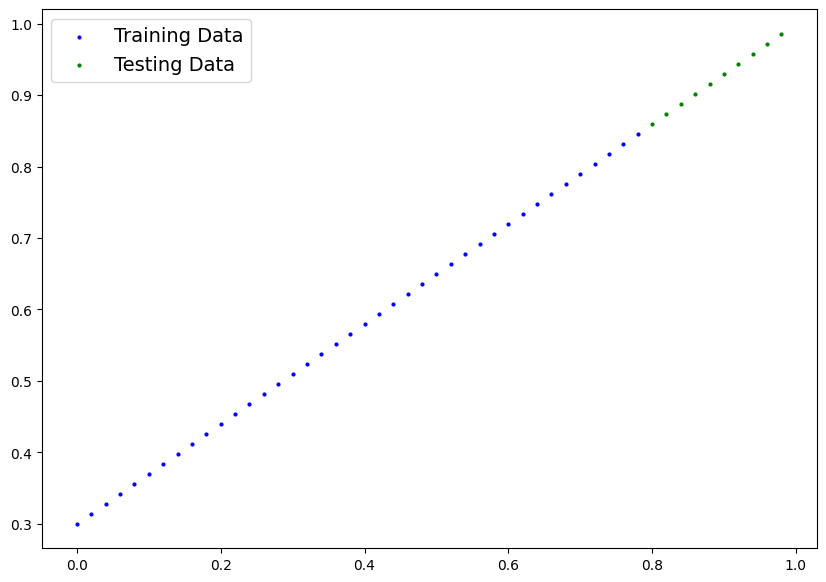

In [104]:
plot_predictions(x_train, y_train, x_test, y_test)

In [90]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,
                              dtype=torch.float),
                              requires_grad=True)
    self.bias=nn.Parameter(torch.randn(1,
                              dtype=torch.float),
                              requires_grad=True)
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

Linear Regression Model Defining  (Longer version)

Linear Regression Model Defining  (Shorter version)

In [91]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer=nn.Linear(in_features=1,
                                out_features=1)
  def  forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x) #bununla kurduğumuza model_1 diyelim

Defining model_0 is a linear model

In [92]:
torch.manual_seed(42)
model_1=LinearRegressionModelV2()
model_1

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

Looking current weight and bias values

In [93]:
model_1.state_dict()  #HAS TO BE --> weight: 0.7, bias: 0.3

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

Model current device

In [94]:
next(model_1.parameters()).device

device(type='cpu')

Set for target device

In [95]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

For training we need:
* Loss Function
* Optimizer
* Training Loop
* Testing Loop

Loss Function (L1Loss, same as MAE)

In [96]:
loss_fn=nn.L1Loss()

Optimizer

In [97]:
optimizer=torch.optim.SGD(params=model_1.parameters(), lr=0.01)

Train and evaluate

In [98]:
torch.manual_seed(42)
epochs=1000
train_loss_values=[]
test_loss_values=[]
epoch_count=[]

x_train = x_train.to(device)
x_test = x_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()
  y_pred=model_1(x_train)
  loss=loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_preds=model_1(x_test)
    test_loss=loss_fn(test_preds, y_test)
    if epoch %100==0:
      print(f"Epoch: {epoch} |  MAE Train Loss: {loss} |MAE Test Loss: {test_loss}")



Epoch: 0 |  MAE Train Loss: 0.5551779866218567 |MAE Test Loss: 0.5739762187004089
Epoch: 100 |  MAE Train Loss: 0.006215679459273815 |MAE Test Loss: 0.014086711220443249
Epoch: 200 |  MAE Train Loss: 0.0012645035749301314 |MAE Test Loss: 0.013801807537674904
Epoch: 300 |  MAE Train Loss: 0.0012645035749301314 |MAE Test Loss: 0.013801807537674904
Epoch: 400 |  MAE Train Loss: 0.0012645035749301314 |MAE Test Loss: 0.013801807537674904
Epoch: 500 |  MAE Train Loss: 0.0012645035749301314 |MAE Test Loss: 0.013801807537674904
Epoch: 600 |  MAE Train Loss: 0.0012645035749301314 |MAE Test Loss: 0.013801807537674904
Epoch: 700 |  MAE Train Loss: 0.0012645035749301314 |MAE Test Loss: 0.013801807537674904
Epoch: 800 |  MAE Train Loss: 0.0012645035749301314 |MAE Test Loss: 0.013801807537674904
Epoch: 900 |  MAE Train Loss: 0.0012645035749301314 |MAE Test Loss: 0.013801807537674904


In [99]:
model_1.state_dict()  #çok yaklaşmış

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

def y_preds

In [106]:
with torch.inference_mode():
  y_preds=model_1(x_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

Plot y_preds

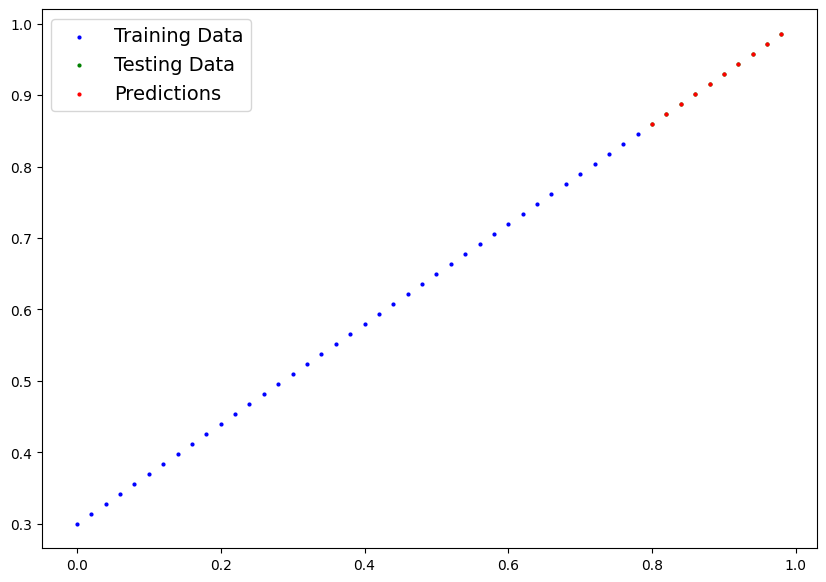

In [108]:
plot_predictions(predictions=y_preds)

Save and Load

In [115]:
from pathlib import Path
Model_Path = Path("models")
Model_Path.mkdir(parents=True, exist_ok=True)

Model_Name="First NN Project.pth"
Model_Save_Path=Model_Path / Model_Name

print(f"Saving model to: {Model_Save_Path}")
torch.save(obj=model_1.state_dict(), f=Model_Save_Path)

Saving model to: models/First NN Project.pth
